                      Нижегородский государственный университет имени Н. И. Лобачевского
 
                                          Радиофизический факультет

                                            Кафедра математики
                                            

 # Отчет по лабораторной работе №7 "Задача Коши"
                                              
                                              Вариант 19
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                            Выполнила: Широкова Анастасия,430 гр.
                                                                            Проверил: Шиндин А. В.

                                          Нижний Новгород, 2016 год.
                                    

### Содержание
1. Постановка задачи.
2. Описание используемых алгоритмов.
3. Исходный код программы. Результаты работы программы.
4. Анализ результатов.

**1. Постановка задачи.**

0) Взять из билета своего варианта дифференциальное уравнение, метод решения, начальные условия, диапазон изменения аргумента, а также относительную точность.

Решить **методом Тейлора 4-го порядка** задачу Коши

$$9y''+18y'+27y=e^{-3x}$$
$$y(0)=1; y'(0)=0; x\in [0,2]$$
с *заданной относительной точностью* $\epsilon=0.01$ 

1) Решить заданным методом дифференциальное уравнение из пункта 0. (+3 балла)

2) Обеспечить работу программы с системой дифференциальных уравнений первого порядка ***в режиме «черного ящика» (black box)***. (+3 балла)

3) Найти ***точное решение***, сравнить найденное решение с точным. (+3 балла)

4) Найти решение с помощью ***метода Рунге-Кутты кратности 4-5***. (+3 балла) 

Результаты решения представить в виде ***фазовых траекторий***.


**2. Описание используемых алгоритмов.**
При численном решении задачи Коши 

$$y'(x)=f(x,y(x)), x\in (a,b),$$
$$y(a)=y^0$$
Протстейшим постороения приближенного решения в точке $x_{n+1}$ основанный на разложении решения в ряд Тейлора
в предыдущей точке сетки $x_{n}$ по степеням шага h:


$$y(x_{n+1})=y(x_n)+h\Delta(x_n,y_n,h)$$
Где $\Delta(x_n,y_n,h)$ - ряд Тейлора, вместо него берется конечный ряд из p членов, где p-порядок метода.
$$ y'=f(x,y(x))$$
$$ y''=f'_x+f'_yf$$
$$ y'''=f''_{xx}+f'_xf'_y+((f'_y)^2+2f''_{xy})f+f''_{yy}f^2$$
и так далее
   

*Четырехкратный метод Рунге-Кутта*:

$$y_{n+1}=y_n+\frac h 6 (k_1+2k_2+2k_3+k_4),$$
$$y_0=y^0, n=0,...,N-1; x_n \in \omega_n$$
При этом
$$k_1=f(x_n,y_n)$$
$$k_2=f(x_n+\frac h 2, y_n+\frac {hk_1} 2)$$
$$k_3=f(x_n+\frac h 2, y_n+\frac {hk_2} 2)$$
$$k_4=f(x_n+h, y_n+hk_3)$$

**3. Исходный код программы. Результаты работы программы.**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *

In [2]:
#Заданная функция
def f2(x,y):
    return [y[1],1/9*(-18*y[1] - 27*y[0] + math.exp(-3*x))]
    

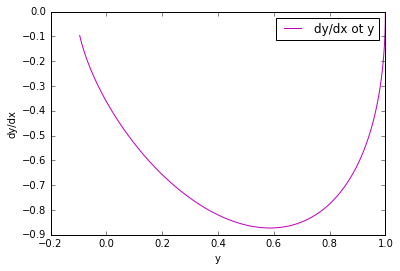

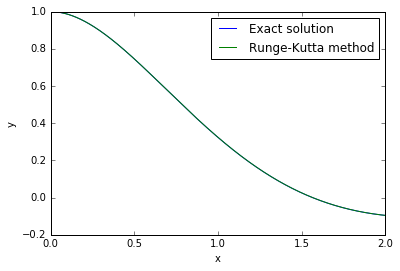

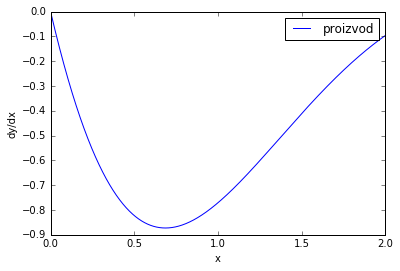

Разница между точным решением и методом Рунге-Кутта


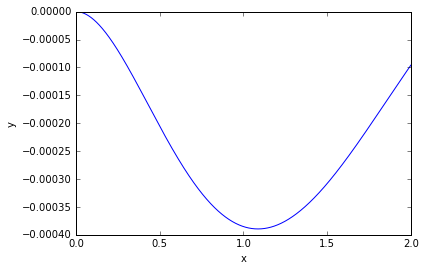

In [3]:
#Нахождение решения методом Рунге-КУтта 4-го порядка и точное решение 
def runge_kutt(f2,y0,x0,e):
    h=0.001
    kq=(x0[1]-x0[0])/h
    kq=math.trunc(kq)
    n=len(y0)
    x=[x0[0]+h*l for l in range (0,kq)]
    yrk=np.zeros((n,kq))
    k11=np.zeros(n); k22=np.zeros(n); k33=np.zeros(n); k44=np.zeros(n)
    for i in range (0,n):  
        yrk[i,0]=y0[i]
    for j in range (1,kq):
        k11=np.zeros(n); k22=np.zeros(n); k33=np.zeros(n); k44=np.zeros(n)
        k11=f2(x[j-1],[yrk[i,j-1] for i in range(0,n)])
        k22=f2(x[j-1]+h/2,[yrk[i,j-1]+h/2*k11[i] for i in range(0,n)])
        k33=f2(x[j-1]+h/2,[yrk[i,j-1]+h/2*k22[i] for i in range (0,n)])
        k44=f2(x[j-1]+h,[yrk[i,j-1]+h*k33[i] for i in range (0,n)])
        for i in range (0,n):
            yrk[i,j]=yrk[i,j-1]+h/6*(k11[i]+2*k22[i]+2*k33[i]+k44[i])
    return [yrk[0,:],yrk[1,:]]


plt.xlabel('y')
plt.ylabel('dy/dx')
fy=runge_kutt(f2,[1,0],[0,2],1000)[0]
fdy=runge_kutt(f2,[1,0],[0,2],1000)[1]
plt.plot(fy,fdy,label='dy/dx ot y', c= 'm')
plt.legend()
plt.show()


#Точное решение
def tochnoresh(x): 
    return 1/54*math.exp(-3*x)*(28*2**(1/2)*math.exp(2*x)*math.sin(2**(1/2)*x) + 53*math.exp(2*x)*math.cos(2**(1/2)*x) + 1)
xg = np.linspace(0,2,2000)
yg = [tochnoresh(l) for l in xg]
plt.xlabel('x')
plt.ylabel('y')              
plt.plot(xg,yg,label = 'Exact solution')


xg = np.linspace(0,2,2000)    
plt.plot(xg,fy,label='Runge-Kutta method')
plt.legend()
plt.show()

plt.xlabel('x')
plt.ylabel('dy/dx')
plt.plot(xg,fdy,label='proizvod')
plt.legend()
plt.show()

print('Разница между точным решением и методом Рунге-Кутта')
plt.xlabel('x')
plt.ylabel('y')              
plt.plot(xg,yg-fy)


In [5]:
def f(j,h,y):
    #return [y[1][j],y[2][j],2*y[0][j]+2*y[2][j]+cos(j*h)*exp(2*j*h)]
    return [y[1][j],1/9*(-18*y[1][j] - 27*y[0][j] + math.exp(-3*j*h))]

def rp():
   
    return ["y1","1/9*(-27*y0 -18*y1 + exp(-3*u))"]

In [25]:
def tei(f,y0,x0,s):
    
    h = (x0[1]-x0[0])/s   # шаг
    x = np.linspace(x0[0],x0[1],s)
    n = len(y0)
    y = np.zeros((n,s))
    for i in range(0,n):
        y[i][0] = y0[i]
        
    u = Symbol('u')
    y0 = Symbol('y0')
    y1 = Symbol('y1')
   
    g00 = diff((rp())[0],y0)
    g01 = diff((rp())[0],y1)
    g20 = diff((rp())[1],y0)
    g21 = diff((rp())[1],y1)
                                
    J_1 = Matrix([[g00,g01],[g20,g21]])# производная f по y  
  
    
    g00 = diff((rp())[0],y0,u)
    g01 = diff((rp())[0],y1,u)
    g20 = diff((rp())[1],y0,u)
    g21 = diff((rp())[1],y1,u)
    
                                
    J_2 = Matrix([[g00,g01],[g20,g21]])# производная f по x
  
    g00 = diff((rp())[0],y0,u,2)
    g01 = diff((rp())[0],y1,u,2)

    g20 = diff((rp())[1],y0,u,2)
    g21 = diff((rp())[1],y1,u,2)
   
                                
    J_3 = Matrix([[g00,g01],[g20,g21]])  
    #print(M_Ia_2sh_x)   
    
    f_1 = Matrix([0,0])  # компонеты ветора функции f правой части
    f_2 = Matrix([0,0])
    f_3 = Matrix([0,0])
 
    
    for j in range(0,s-1):
        y_prev = (y.T)[j]   
        vf = Matrix(f(j,h,y))

        f_1[0] = diff((rp())[0],u).evalf(subs={u:j*h}) # производная по x от f
        f_1[1] = diff((rp())[1],u).evalf(subs={u:j*h})
       
        f_2[0] = diff((rp())[0],u,2).evalf(subs={u:j*h})
        f_2[1] = diff((rp())[1],u,2).evalf(subs={u:j*h})
       
      
        f_3[0] = diff((rp())[0],u,3).evalf(subs={u:j*h})
        f_3[1] = diff((rp())[1],u,3).evalf(subs={u:j*h})
       
        
    
        y_2sh = f_1 + J_1*vf
        y_3sh = f_2 + J_2*vf+J_1*f_1
        y_4sh = f_3 + J_3*vf + J_2 * f_1 + J_1 * f_2 + J_2*f_1
        
        y_next = y_prev + h*vf + h*h/2 * y_2sh + h*h*h/6 *y_3sh + h*h*h*h/24 *y_4sh
        
       
        for i in range(0,n):
            y[i][j+1] = y_next[i]
    return y[0],y[1]
                                         
    

In [26]:
#для обеспечения заданной точности
def itog(f,y0,x0,eps):
    s = 100
    
    while(1>0):

        y1 = (tei(f,y0,x0,s))[0]
        y2 = (tei(f,y0,x0,s*2))[0]

        if ((y2[-1]-y1[-1])/y2[-1] < eps):
            break
        else:
            s = 2 * s
    print(s)
    
    print('решение методом Тейлора 4-го порядка')
    plt.xlabel('x')
    plt.ylabel('y') 
    x = np.linspace(x0[0],x0[1],s)
    y_final = tei(f,[1,0],[0,2],s)[0] 
    plt.plot(x,y_final)
    plt.show()
   
    print('разница между точным решением и решением Метода Тейлора 4-го порядка')
    plt.xlabel('x')
    plt.ylabel('y') 
    ytr = [tochnoresh(l) for l in x]             
    plt.plot(x,ytr-y_final,label = 'Tochnoe reshenie, metod Teilor ')
    plt.legend()
    plt.show()
         
    plt.xlabel('x')
    plt.ylabel('y')  
    plt.plot(tei(f,y0,x0,s)[0],tei(f,y0,x0,s)[1])
    plt.plot(fy,fdy,label='faz', c= 'm')
    plt.legend()
    plt.show()
    
    plt.xlabel('x')
    plt.ylabel('dy/dx')
    plt.plot(x,tei(f,y0,x0,s)[1])
   
  
   
   

1600
решение методом Тейлора 4-го порядка


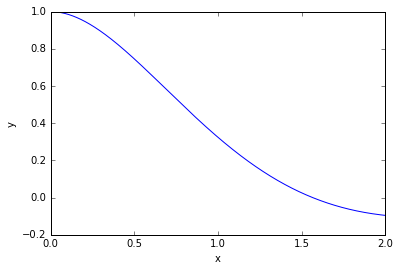

разница между точным решением и решением Метода Тейлора 4-го порядка


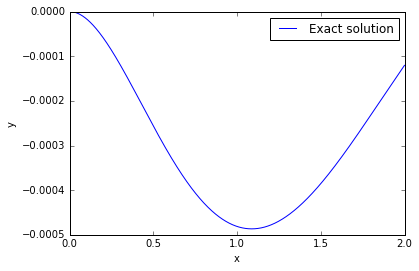

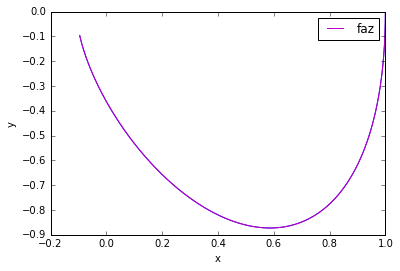

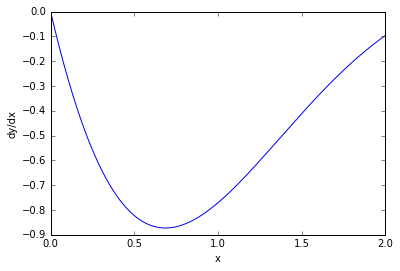

In [27]:
final_func(f,[1,0],[0,2],0.001)